# Return and Risk

## Imported Modules 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

##  Risk and Return 

When we think of an investment, we have to remember two things – its upside and its downside. In
other words, we should consider the profit that will be made if everything goes well and the risk of
losses if the investmentis unsuccessful.

### Calculating rates of return

Returns can only be compared among investments with the same hoding period(time frame):
- daily return
- weekly return
- monthly return 
- annual or yearly return
- Historical Rates of Return
- Future Rates of Return (Expected Return)
    - Prediction with statistical and machine learning models
    - approximation of financial models. 

In [75]:
import yfinance as yf

In [76]:
msft = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers ="MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5000d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = False,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [77]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-15,34.330002,34.810001,34.250000,34.775002,21.954210,60717400
2002-01-16,34.424999,34.919998,33.924999,33.935001,21.423895,61955400
2002-01-17,34.264999,35.000000,34.200001,34.930000,22.052065,78958000
2002-01-18,33.549999,33.924999,32.709999,33.049999,20.865177,107140400
2002-01-22,33.305000,33.314999,32.125000,32.230000,20.347494,76837200


In [78]:
msft.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-16,335.679993,340.670013,335.510010,339.510010,338.890015,20886800
2021-11-17,338.940002,342.190002,338.000000,339.119995,339.119995,19053400
2021-11-18,338.179993,342.450012,337.119995,341.269989,341.269989,22463500
2021-11-19,342.640015,345.100006,342.200012,343.109985,343.109985,21942200
2021-11-22,344.619995,349.665009,341.589996,343.790009,343.790009,21287658


**Simple Rate of Return**

$$
r=\frac{P_1-P_0}{P_0}
$$

In [79]:
msft["simple_return"]=(msft["Close"]-msft["Close"].shift(1))/msft["Close"].shift(1)
msft["simple_return"].head(3)

Date
2002-01-15         NaN
2002-01-16   -0.024155
2002-01-17    0.029321
Name: simple_return, dtype: float64

<AxesSubplot:xlabel='Date'>

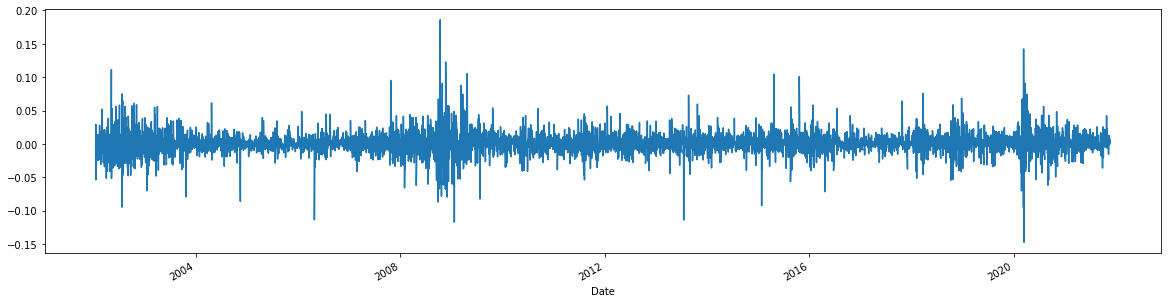

In [80]:
msft["simple_return"].plot(figsize=(20,5))

In [81]:
average_annual_return=msft["simple_return"].mean()*250
average_annual_return

0.15301952626461698

In [82]:
print(str(round(average_annual_return, 5)*100)+"%")

15.302%


**Log Returns**
$$
ln\bigg(\frac{P_t}{P_{t-1}}\bigg)
$$

In [83]:
msft["log_return"]=np.log(msft["Close"]/msft["Close"].shift(1))
msft.head(5)

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2002-01-15,34.330002,34.810001,34.250000,34.775002,21.954210,60717400,NaN,NaN
2002-01-16,34.424999,34.919998,33.924999,33.935001,21.423895,61955400,-0.024155,-0.024452
2002-01-17,34.264999,35.000000,34.200001,34.930000,22.052065,78958000,0.029321,0.028899
2002-01-18,33.549999,33.924999,32.709999,33.049999,20.865177,107140400,-0.053822,-0.055325
2002-01-22,33.305000,33.314999,32.125000,32.230000,20.347494,76837200,-0.024811,-0.025124


<AxesSubplot:xlabel='Date'>

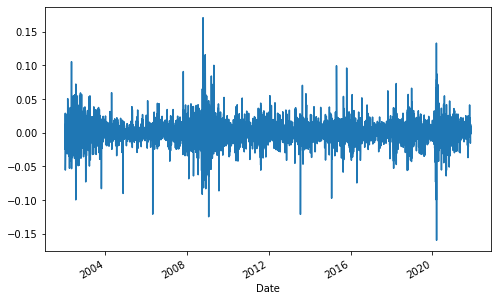

In [84]:
msft["log_return"].plot(figsize=(8,5))

In [85]:
log_annual_return=msft["log_return"].mean()*250
log_annual_return

0.11457952835638932

In [86]:
print(str(round(log_annual_return,5)*100)+"%")

11.458%


### Investment  Portfolio 

Most investors own several stocks, and the set of stocks that an investor owns is called his
investment portfolio

Calculating the rate of return of a portfolio is an easy and intuitive task. We have the rates of return
of individual securities, and we only have to multiply each security’s rate of return by the weight it
has in the overall portfolio.
-  Portfolio weight is determined by dividing the dollar value of a security by the total dollar value of the portfolio

In [87]:
data = yf.download( 
        tickers ="MSFT,IBM,GE ,F",
        period = "5000d",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  4 of 4 completed


In [88]:
data.head(3)

MSFT                                                   IBM  \
                 Open       High        Low      Close    Volume       Open   
Date                                                                          
2002-01-15  21.673272  21.976306  21.622765  21.954210  60717400  69.078452   
2002-01-16  21.733247  22.045750  21.417586  21.423901  61955400  69.049196   
2002-01-17  21.632232  22.096253  21.591197  22.052061  78958000  70.131747   

                                                              F            \
                 High        Low      Close    Volume      Open      High   
Date                                                                        
2002-01-15  70.043970  68.885351  69.546585   5907703  8.648509  8.870412   
2002-01-16  69.488069  68.610324  68.698097   5613150  8.477813  8.705406   
2002-01-17  70.541358  68.616172  70.161003  11666770  8.506261  8.511951   

                                                  GE                          \
                 Low     Close    Volume        Open        High         Low   
Date                                                                           
2002-01-15  8.483505  8.557472   9463000  164.930885  170.123150  163.927340   
2002-01-16  8.449365  8.511952   7703100  167.548846  167.941547  164.538211   
2002-01-17  8.244530  8.364016  13617400  169.730426  169.774048  167.112475   

                                 
                 Close   Volume  
Date                             
2002-01-15  168.901443  3386149  
2002-01-16  164.581833  2976337  
2002-01-17  169.075943  2932852

In [89]:
data.columns

MultiIndex([('MSFT',   'Open'),
            ('MSFT',   'High'),
            ('MSFT',    'Low'),
            ('MSFT',  'Close'),
            ('MSFT', 'Volume'),
            ( 'IBM',   'Open'),
            ( 'IBM',   'High'),
            ( 'IBM',    'Low'),
            ( 'IBM',  'Close'),
            ( 'IBM', 'Volume'),
            (   'F',   'Open'),
            (   'F',   'High'),
            (   'F',    'Low'),
            (   'F',  'Close'),
            (   'F', 'Volume'),
            (  'GE',   'Open'),
            (  'GE',   'High'),
            (  'GE',    'Low'),
            (  'GE',  'Close'),
            (  'GE', 'Volume')],
           )

In [90]:
market=pd.DataFrame()
market["MSFT"]=data[("MSFT","Close")]
market["GE"]=data[("GE","Close")]
market["IBM"]=data[("IBM","Close")]
market["F"]=data[("F","Close")]
market.head(5)

,MSFT,GE,IBM,F
Date,,,,
2002-01-15,21.954210,168.901443,69.546585,8.557472
2002-01-16,21.423901,164.581833,68.698097,8.511952
2002-01-17,22.052061,169.075943,70.161003,8.364016
2002-01-18,20.865179,168.770554,66.854813,8.250219
2002-01-22,20.347494,167.112473,64.660484,8.210389


In [91]:
normalized_market=100*market/market.iloc[0]
normalized_market.tail(5)

,MSFT,GE,IBM,F
Date,,,,
2021-11-16,1543.621976,61.189529,170.331870,230.101280
2021-11-17,1544.669522,60.384326,169.756714,232.077863
2021-11-18,1554.462605,59.602805,167.743684,228.572164
2021-11-19,1562.843668,59.182442,166.866573,226.585595
2021-11-22,1565.662841,60.117484,168.635165,241.718570


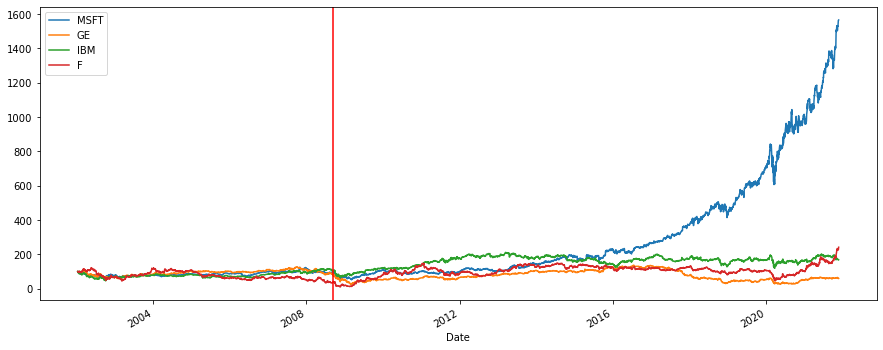

In [92]:
normalized_market.plot(figsize=(15,6))
plt.axvline(pd.to_datetime("2008-09-15"),color="red")

In [93]:
returns=(market-market.shift(1))/market.shift(1)
returns.head()

,MSFT,GE,IBM,F
Date,,,,
2002-01-15,NaN,NaN,NaN,NaN
2002-01-16,-0.024155,-0.025575,-0.012200,-0.005319
2002-01-17,0.029321,0.027306,0.021295,-0.017380
2002-01-18,-0.053822,-0.001806,-0.047123,-0.013605
2002-01-22,-0.024811,-0.009824,-0.032822,-0.004828


**Market Index**

A market index provides an idea about how a given stock market is performing. It represents a large
enough sample of the overall number of stocks in that market and can be considered a good enough
proxy of the overall development of the market.

A stock index gives you a sense of the type of return you can expect if you invest in a welldiversified portfolio in a given market.

In [94]:

index_data = yf.download( 
        tickers ="^GSPC,^IXIC,^GDAXI ,^FTSE",
        period = "5000d",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  4 of 4 completed


In [95]:
index_data.head(10)

^FTSE                              ^IXIC                            \
            Open High Low Close Volume         Open         High          Low   
Date                                                                            
2002-01-15   NaN  NaN NaN   NaN    NaN  1994.880005  2011.250000  1977.280029   
2002-01-16   NaN  NaN NaN   NaN    NaN  1976.420044  1981.810059  1944.319946   
2002-01-17   NaN  NaN NaN   NaN    NaN  1968.699951  1985.829956  1954.060059   
2002-01-18   NaN  NaN NaN   NaN    NaN  1943.560059  1964.739990  1922.699951   
2002-01-22   NaN  NaN NaN   NaN    NaN  1946.869995  1947.410034  1882.140015   
2002-01-23   NaN  NaN NaN   NaN    NaN  1889.530029  1925.150024  1879.239990   
2002-01-24   NaN  NaN NaN   NaN    NaN  1937.670044  1959.930054  1936.339966   
2002-01-25   NaN  NaN NaN   NaN    NaN  1929.150024  1951.790039  1923.060059   
2002-01-28   NaN  NaN NaN   NaN    NaN  1951.119995  1958.959961  1925.430054   
2002-01-29   NaN  NaN NaN   NaN    NaN  1947.089966  1959.050049  1883.489990   

                                      ^GDAXI                        \
                  Close        Volume   Open High Low Close Volume   
Date                                                                 
2002-01-15  2000.910034  1.675150e+09    NaN  NaN NaN   NaN    NaN   
2002-01-16  1944.439941  1.917270e+09    NaN  NaN NaN   NaN    NaN   
2002-01-17  1985.819946  1.893110e+09    NaN  NaN NaN   NaN    NaN   
2002-01-18  1930.339966  1.693010e+09    NaN  NaN NaN   NaN    NaN   
2002-01-22  1882.530029  1.817220e+09    NaN  NaN NaN   NaN    NaN   
2002-01-23  1922.380005  1.871120e+09    NaN  NaN NaN   NaN    NaN   
2002-01-24  1942.579956  1.907870e+09    NaN  NaN NaN   NaN    NaN   
2002-01-25  1937.699951  1.655310e+09    NaN  NaN NaN   NaN    NaN   
2002-01-28  1943.910034  1.482080e+09    NaN  NaN NaN   NaN    NaN   
2002-01-29  1892.989990  1.875380e+09    NaN  NaN NaN   NaN    NaN   

                  ^GSPC                                                       
                   Open         High          Low        Close        Volume  
Date                                                                          
2002-01-15  1138.410034  1148.810059  1136.880005  1146.189941  1.386900e+09  
2002-01-16  1146.189941  1146.189941  1127.489990  1127.569946  1.482500e+09  
2002-01-17  1127.569946  1139.270020  1127.569946  1138.880005  1.380100e+09  
2002-01-18  1138.880005  1138.880005  1124.449951  1127.579956  1.333300e+09  
2002-01-22  1127.579956  1135.260010  1117.910034  1119.310059  1.311600e+09  
2002-01-23  1119.310059  1131.939941  1117.430054  1128.180054  1.479200e+09  
2002-01-24  1128.180054  1139.500000  1128.180054  1132.150024  1.552800e+09  
2002-01-25  1132.150024  1138.310059  1127.819946  1133.280029  1.345100e+09  
2002-01-28  1133.280029  1138.630005  1126.660034  1133.060059  1.186800e+09  
2002-01-29  1133.060059  1137.469971  1098.739990  1100.640015  1.812000e+09

In [96]:
ind=pd.DataFrame()
ind["SP500"]=index_data[("^GSPC","Close")]
ind["FTSE"]=index_data[("^FTSE","Close")]
ind["DAX"]=index_data[("^GDAXI","Close")]
ind["NASDAQ"]=index_data[("^IXIC","Close")]
ind=ind.dropna(axis=0)

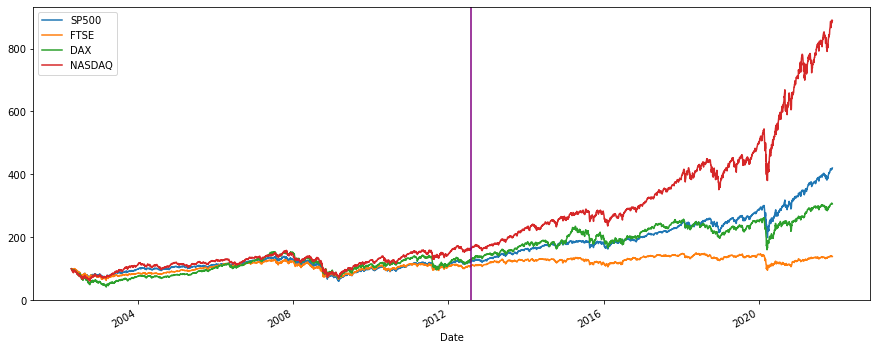

In [97]:
(ind/ind.iloc[0]*100).plot(figsize=(15,6))
plt.axvline(pd.to_datetime("2012-8-5"),color="purple")
plt.show()

In [98]:
ind_returns=(ind-ind.shift(1))/ind.shift(1)
ind_returns.head()

,SP500,FTSE,DAX,NASDAQ
Date,,,,
2002-04-18,NaN,NaN,NaN,NaN
2002-04-19,0.000623,0.002715,0.004118,-0.003107
2002-04-22,-0.015411,-0.004215,-0.014962,-0.021232
2002-04-23,-0.006201,-0.005841,-0.002570,-0.016143
2002-04-24,-0.007103,0.005240,-0.006155,-0.009796


In [99]:
annual_index_returns=ind_returns.mean()*250
annual_index_returns

SP500     0.094161
FTSE      0.035004
DAX       0.085822
NASDAQ    0.138342
dtype: float64